In [1]:
import sys
sys.path.append("./tools")

In [2]:
import numpy as np

import qiskit
from qiskit import QuantumCircuit
from qiskit import execute, Aer

simulator = Aer.get_backend('qasm_simulator')

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
palette = {
    'unitary': '#FF9966', 'vqc': '#66CC99', 
}

In [5]:
%matplotlib inline

In [6]:
%%html
<style>
table {float:left;}
</style>

## Tool Modules

In [7]:
from quantum import *
from measurements import *

from unitary import *
from VQC import *

from dataSL import *
from QOLearner import *

from noise import *
from lipschitz import *

## Prepare Circuits

### - Input Circuits

In [8]:
n = 2

In [9]:
def getInputCircuit(n):
    circuit = QuantumCircuit(2 * n, 2 * n)
    
    for i in range(n):
        circuit.h(i)
        circuit.cx(i, n + i)
    circuit.barrier()
    
    return circuit

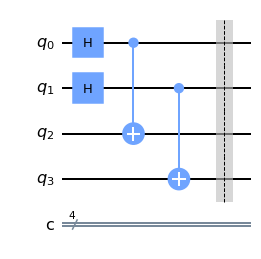

In [10]:
inputCircuit = getInputCircuit(n)
inputCircuit.draw(output='mpl')

### - Output Circuits

In [11]:
# empty output citcuit
afterCircuit = QuantumCircuit(2 * n, 2 * n)

## Train paramters

In [12]:
import time
import sys
stdout = sys.stdout

In [13]:
# experiments times
MAX_TIMES = 10

### - expecetd

In [14]:
# expected = {'0000':1, '0101':1, '0010':1, '0111':1, '1000':1, '1101':1, '1010':1, '1111':1}
expected = {'0000':1, '0011':1, '0101':1, '0110':1, '1000':1, '1011':1, '1101':1, '1110':1}

## Strategy: Unitary

In [16]:
qol_unitary = QOLearnerBase([inputCircuit, afterCircuit], 2, [2, 3], expected)

In [27]:
times_unitary = []

for i in range(MAX_TIMES):
    start = time.perf_counter()
    qol_unitary.fit(epoch=1000, strategy='unitary', stepsize=0.004, early_stopping=True, regularization_lambda=0.05)
    end = time.perf_counter()
    times_unitary.append(end - start)
    print(f'Fin - No. {i + 1}')
    
    saveParams(qol_unitary.params[-1], 'sqtr', 'unitary', i + 1 + MAX_TIMES)
    saveLosses(qol_unitary.losses, 'sqtr', 'unitary', i + 1 + MAX_TIMES)

epoch: [1/1000] - loss: (0.0063739577978011355+0j) end.
epoch: [2/1000] - loss: (0.006234855215547654+0j) end.
epoch: [3/1000] - loss: (0.0060934712701863816+0j) end.
epoch: [4/1000] - loss: (0.005950040895285316+0j) end.
epoch: [5/1000] - loss: (0.005804806453130501+0j) end.
epoch: [6/1000] - loss: (0.0056580206176174135+0j) end.
epoch: [7/1000] - loss: (0.005509944491762465+0j) end.
epoch: [8/1000] - loss: (0.005360849297612844+0j) end.
epoch: [9/1000] - loss: (0.005211015504731233+0j) end.
epoch: [10/1000] - loss: (0.005060731000892539+0j) end.
epoch: [11/1000] - loss: (0.004910291999641148+0j) end.
epoch: [12/1000] - loss: (0.004759999932568781+0j) end.
epoch: [13/1000] - loss: (0.004610160909305603+0j) end.
epoch: [14/1000] - loss: (0.004461083560724604+0j) end.
epoch: [15/1000] - loss: (0.004313076044838706+0j) end.
epoch: [16/1000] - loss: (0.00416644390906024+0j) end.
epoch: [17/1000] - loss: (0.0040214884620042995+0j) end.
epoch: [18/1000] - loss: (0.0038785020536276655+0j) en

epoch: [67/1000] - loss: (0.0031704791659022866+0j) end.
epoch: [68/1000] - loss: (0.003121620837690578+0j) end.
epoch: [69/1000] - loss: (0.003073646557423513+0j) end.
epoch: [70/1000] - loss: (0.0030265283347696856+0j) end.
epoch: [71/1000] - loss: (0.002980240676904779+0j) end.
epoch: [72/1000] - loss: (0.0029347598379763557+0j) end.
epoch: [73/1000] - loss: (0.0028900643960461203+0j) end.
epoch: [74/1000] - loss: (0.0028461334502139905+0j) end.
epoch: [75/1000] - loss: (0.0028029489421329125+0j) end.
epoch: [76/1000] - loss: (0.0027604928442597526+0j) end.
epoch: [77/1000] - loss: (0.002718748909409872+0j) end.
epoch: [78/1000] - loss: (0.0026777015703909426+0j) end.
epoch: [79/1000] - loss: (0.002637335761379558+0j) end.
epoch: [80/1000] - loss: (0.002597637173008243+0j) end.
epoch: [81/1000] - loss: (0.0025585921199767123+0j) end.
epoch: [82/1000] - loss: (0.0025201865263861515+0j) end.
epoch: [83/1000] - loss: (0.0024824071149129336+0j) end.
epoch: [84/1000] - loss: (0.002445240

epoch: [41/1000] - loss: (0.0013507532133616303+0j) end.
epoch: [42/1000] - loss: (0.0013329221631479162+0j) end.
epoch: [43/1000] - loss: (0.0013157267640693789+0j) end.
epoch: [44/1000] - loss: (0.0012991335840973094+0j) end.
epoch: [45/1000] - loss: (0.0012831098079923006+0j) end.
epoch: [46/1000] - loss: (0.0012676236881930098+0j) end.
epoch: [47/1000] - loss: (0.0012526447728843022+0j) end.
epoch: [48/1000] - loss: (0.0012381440048432589+0j) end.
epoch: [49/1000] - loss: (0.0012240944209597495+0j) end.
epoch: [50/1000] - loss: (0.001210470171874257+0j) end.
epoch: [51/1000] - loss: (0.0011972477730881942+0j) end.
epoch: [52/1000] - loss: (0.0011844045127273532+0j) end.
epoch: [53/1000] - loss: (0.0011719191609231702+0j) end.
epoch: [54/1000] - loss: (0.0011597712094751258+0j) end.
epoch: [55/1000] - loss: (0.0011479404872418151+0j) end.
epoch: [56/1000] - loss: (0.0011364083068177565+0j) end.
epoch: [57/1000] - loss: (0.0011251554457847614+0j) end.
epoch: [58/1000] - loss: (0.0011

epoch: [16/1000] - loss: (0.0026268266230680174+0j) end.
epoch: [17/1000] - loss: (0.002521474487682851+0j) end.
epoch: [18/1000] - loss: (0.002417896264449301+0j) end.
epoch: [19/1000] - loss: (0.002316141364945248+0j) end.
epoch: [20/1000] - loss: (0.0022162647056901278+0j) end.
epoch: [21/1000] - loss: (0.0021183212962118136+0j) end.
epoch: [22/1000] - loss: (0.0020223595338381612+0j) end.
epoch: [23/1000] - loss: (0.0019284135967528183+0j) end.
epoch: [24/1000] - loss: (0.001836500471896491+0j) end.
epoch: [25/1000] - loss: (0.001746617991368913+0j) end.
epoch: [26/1000] - loss: (0.0016587500739105936+0j) end.
epoch: [27/1000] - loss: (0.0015728779112390585+0j) end.
epoch: [28/1000] - loss: (0.0014889901225023604+0j) end.
epoch: [29/1000] - loss: (0.001407093503333118+0j) end.
epoch: [30/1000] - loss: (0.0013272189819920495+0j) end.
epoch: [31/1000] - loss: (0.001249422480158004+0j) end.
epoch: [32/1000] - loss: (0.0011737809225400905+0j) end.
epoch: [33/1000] - loss: (0.0011003881

epoch: [102/1000] - loss: (0.0006609070875918063+0j) end.
epoch: [103/1000] - loss: (0.0006456015264511963+0j) end.
epoch: [104/1000] - loss: (0.0006309362562681966+0j) end.
epoch: [105/1000] - loss: (0.0006168794443233337+0j) end.
epoch: [106/1000] - loss: (0.0006033979300782476+0j) end.
epoch: [107/1000] - loss: (0.0005904586826247911+0j) end.
epoch: [108/1000] - loss: (0.0005780291814005018+0j) end.
epoch: [109/1000] - loss: (0.000566078052886643+0j) end.
epoch: [110/1000] - loss: (0.0005545756815470934+0j) end.
epoch: [111/1000] - loss: (0.0005434937910834062+0j) end.
epoch: [112/1000] - loss: (0.0005328067759618994+0j) end.
epoch: [113/1000] - loss: (0.0005224909685804447+0j) end.
Fin - No. 6
epoch: [1/1000] - loss: (0.008369253743920438+0j) end.
epoch: [2/1000] - loss: (0.008194558517354735+0j) end.
epoch: [3/1000] - loss: (0.008016881998106164+0j) end.
epoch: [4/1000] - loss: (0.007836632430739194+0j) end.
epoch: [5/1000] - loss: (0.007654217080953513+0j) end.
epoch: [6/1000] - 

epoch: [43/1000] - loss: (0.0019109013244464005+0j) end.
epoch: [44/1000] - loss: (0.00185336067687478+0j) end.
epoch: [45/1000] - loss: (0.001796557809964225+0j) end.
epoch: [46/1000] - loss: (0.001740512380775661+0j) end.
epoch: [47/1000] - loss: (0.0016852578966507152+0j) end.
epoch: [48/1000] - loss: (0.0016308412985347842+0j) end.
epoch: [49/1000] - loss: (0.0015773192555804281+0j) end.
epoch: [50/1000] - loss: (0.0015247573766670032+0j) end.
epoch: [51/1000] - loss: (0.0014732270138193865+0j) end.
epoch: [52/1000] - loss: (0.0014228034907505817+0j) end.
epoch: [53/1000] - loss: (0.001373562967671231+0j) end.
epoch: [54/1000] - loss: (0.0013255806410455069+0j) end.
epoch: [55/1000] - loss: (0.0012789276009979112+0j) end.
epoch: [56/1000] - loss: (0.001233669917707817+0j) end.
epoch: [57/1000] - loss: (0.0011898649251605696+0j) end.
epoch: [58/1000] - loss: (0.0011475605120486896+0j) end.
epoch: [59/1000] - loss: (0.0011067930428316842+0j) end.
epoch: [60/1000] - loss: (0.001067586

epoch: [43/1000] - loss: (0.0005474339223563561+0j) end.
epoch: [44/1000] - loss: (0.0005263855265930535+0j) end.
epoch: [45/1000] - loss: (0.0005063156569417666+0j) end.
epoch: [46/1000] - loss: (0.00048718951134227783+0j) end.
epoch: [47/1000] - loss: (0.00046897168313746976+0j) end.
epoch: [48/1000] - loss: (0.0004516261674376027+0j) end.
epoch: [49/1000] - loss: (0.0004351165075345716+0j) end.
epoch: [50/1000] - loss: (0.00041940597720872185+0j) end.
epoch: [51/1000] - loss: (0.00040445729668909787+0j) end.
epoch: [52/1000] - loss: (0.00039023399796829055+0j) end.
epoch: [53/1000] - loss: (0.00037669939051981525+0j) end.
epoch: [54/1000] - loss: (0.0003638174819620451+0j) end.
epoch: [55/1000] - loss: (0.000351552975938399+0j) end.
epoch: [56/1000] - loss: (0.00033987181144913575+0j) end.
epoch: [57/1000] - loss: (0.0003287409083096726+0j) end.
epoch: [58/1000] - loss: (0.00031812888629390067+0j) end.
epoch: [59/1000] - loss: (0.0003080059419919672+0j) end.
Fin - No. 10


In [26]:
print(f'Average times for vqc: {np.mean(times_vqc)}')

Average times for vqc: 12.69445088


### - plot a loss example

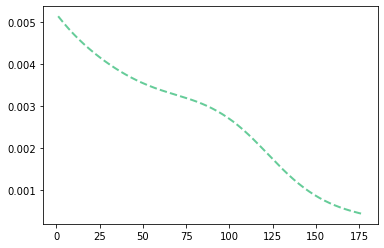

In [27]:
plot(loadLosses('sqt', 'vqc', 15), color=palette['vqc'])

In [28]:
losses_vqc= []
max_length = 0
for i in range(10):
    losses_vqc.append(loadLosses('sqt', 'vqc', i + 1 + 10))
    max_length = max(max_length, len(losses_vqc[-1]))

for i in range(10):
    length = len(losses_vqc[i])
    while length < max_length:
        losses_vqc[i].append(losses_vqc[i][-1])
        length += 1

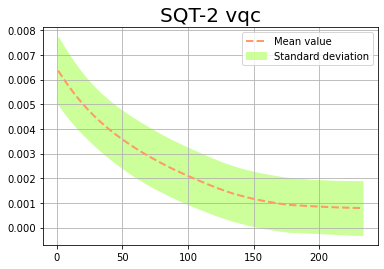

In [29]:
plotLosses(losses_vqc, color="#FF9966", fill_color="#CCFF99", title="SQT-2 vqc")

### - average time and loss

In [31]:
average_loss_vqc = 0.0
for i in range(MAX_TIMES):
    loss = loadLosses('sqt', 'vqc', i + 1 + 10)[-1]
    average_loss_vqc += loss
print(f'Average loss for vqc: {average_loss_vqc / MAX_TIMES}')

Average loss for vqc: (0.0007889714849691325+0j)


In [23]:
average_epoch_vqc = 0
for i in range(MAX_TIMES):
    loss = loadLosses('sqt', 'vqc', i + 1 + 10)
    average_epoch_vqc += len(loss)
print(f'Average epoch for vqc: {average_epoch_vqc / MAX_TIMES}')

Average epoch for vqc: 166.4


In [133]:
average_time_vqc = 5.012995950000186

In [134]:
average_time_per_epoch_vqc = average_time_vqc / average_epoch_vqc
print(f'Average time per epoch for vqc: {average_time_per_epoch_vqc}')

Average time per epoch for vqc: 0.005344345362473546


| Strategy | VQC |
|:----------------:|:-----:|
| Average loss | 1.558e-3 |
| Average time | 5.013 |
| Average epochs | 93.8 |
| Average time per epoch | 0.00534 |

##  Summarize

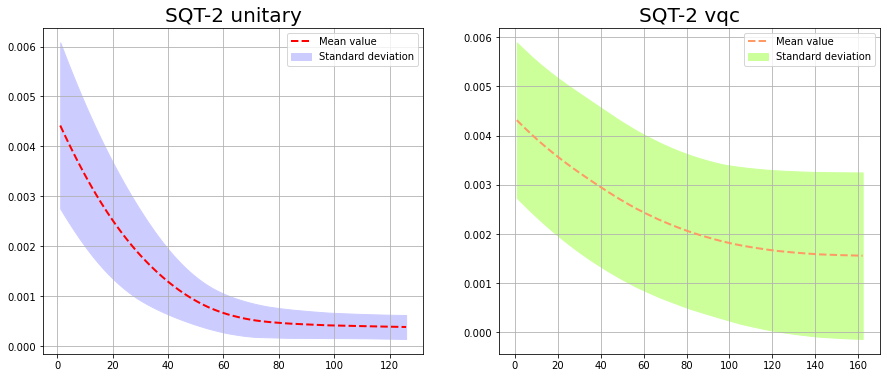

In [124]:
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
plotLosses(losses_unitary, title="SQT-2 unitary")
plt.subplot(1,2,2)
plotLosses(losses_vqc, color="#FF9966", fill_color="#CCFF99", title="SQT-2 vqc")

|Strategy| parameterized unitary | VQC |
|:----------------:|:-----:| :-----:|
| Average loss | 3.8012e-4 | 1.558e-3 |
| Average time | 4.636 | 5.013 |
| Average epochs | 74.0 |93.8 |
| Average time per epoch | 0.00627 | 0.00534 |

## Compare Lipschitz

In [21]:
measurements = getMeasurements(4)

In [102]:
names = ['unitary', 'vqc']

In [136]:
error_params = [
    [0.0001 , 'b'], [0.0001 , 'p'], [0.0001 , 'd'], 
    [0.001 , 'b'], [0.001 , 'p'], [0.001 , 'd'], 
    [0.01 , 'b'], [0.01 , 'p'], [0.01 , 'd'],
    [0.1 , 'b'], [0.1 , 'p'], [0.1 , 'd'], 
]

### - exact Lipschitz

In [137]:
smallestDict = { k: 0 for k in names }

for (p, errorType) in error_params:
    print(f' - p = {p}, errorType: {errorType}')
    
    # simulate noise input circuits
    noiseInputCircuits = getNoiseCircuits([inputCircuit], p, errorType)

    smallest = 1.0; smallestKey = ''
    for name in names: # unitary or vqc
        lip = 0.0
        
        for i in range(MAX_TIMES):
            # build targetCircuit
            params = loadParams('sqt', name, i + 1)
            targetCircuit = QuantumCircuit(4, 4)
            
            if name == 'unitary':
                targetCircuit.append(buildU(2, params), [2, 3])
            else:
                targetCircuit = getVQCCircuit(targetCircuit, 2, params, [2, 3])
                
            lip += calculateExactLipschitz(
                [inputCircuit], noiseInputCircuits, 
                targetCircuit, afterCircuit, measurements
            )
        lip = lip / MAX_TIMES
        
        if lip < smallest:
            smallest = lip
            smallestKey = name
        
        print(f'Lipschitz for [{name}] is: {lip}\n')
    
    smallestDict[smallestKey]  += 1.0
    print(f'smallest one: [{smallestKey}]')
        
    print('-' * 25)
    print()

print(smallestDict)

 - p = 0.0001, errorType: b
Lipschitz for [unitary] is: 0.02417461330853658

Lipschitz for [vqc] is: 0.012986258908676

smallest one: [vqc]
-------------------------

 - p = 0.0001, errorType: p
Lipschitz for [unitary] is: 2.660840428878296e-14

Lipschitz for [vqc] is: 2.05347467880825e-14

smallest one: [vqc]
-------------------------

 - p = 0.0001, errorType: d
Lipschitz for [unitary] is: 0.009670070445862813

Lipschitz for [vqc] is: 0.005194511275026501

smallest one: [vqc]
-------------------------

 - p = 0.001, errorType: b
Lipschitz for [unitary] is: 0.024190345133821917

Lipschitz for [vqc] is: 0.012998106214149752

smallest one: [vqc]
-------------------------

 - p = 0.001, errorType: p
Lipschitz for [unitary] is: 3.272710654952096e-14

Lipschitz for [vqc] is: 2.30656469032528e-14

smallest one: [vqc]
-------------------------

 - p = 0.001, errorType: d
Lipschitz for [unitary] is: 0.009678392459013125

Lipschitz for [vqc] is: 0.005199321659703412

smallest one: [vqc]
------

### - approximate Lipschitz

In [139]:
for name in names: # unitary or vqc
    lip = 0.0
    best_index = -1; best_lip = 1

    for i in range(MAX_TIMES):
        # build targetCircuit
        params = loadParams('sqt', name, i + 1)
        targetCircuit = QuantumCircuit(4, 4)

        if name == 'unitary':
            targetCircuit.append(buildU(2, params), [2, 3])
        else:
            targetCircuit = getVQCCircuit(targetCircuit, 2, params, [2, 3])

        score = calculateLipschitz(targetCircuit, afterCircuit, measurements)
        
        if score < best_lip:
            best_lip = score
            best_index = i + 1
        
        lip += score
                                  
    lip = lip / MAX_TIMES

    print(f'Lipschitz for [{name}] is: {lip}(best params: No.{best_index}({best_lip}))\n')

Lipschitz for [unitary] is: 0.20228300022320292(best params: No.1(0.15815724845714707))

Lipschitz for [vqc] is: 0.14168259880127307(best params: No.1(0.03815543876934357))



In [18]:
names = ['unitary']

In [26]:
for name in names: # unitary or vqc
    lip = 0.0
    best_index = -1; best_lip = 1

    for i in range(MAX_TIMES):
        # build targetCircuit
        params = loadParams('sqtr', name, i + 1 + MAX_TIMES)
        targetCircuit = QuantumCircuit(4, 4)

        if name == 'unitary':
            targetCircuit.append(buildU(2, params), [2, 3])
        else:
            targetCircuit = getVQCCircuit(targetCircuit, 2, params, [2, 3])

        score = calculateLipschitz(targetCircuit, afterCircuit, measurements)
        
        if score < best_lip:
            best_lip = score
            best_index = i + 1
        
        lip += score
                                  
    lip = lip / MAX_TIMES

    print(f'Lipschitz for [{name}] is: {lip}(best params: No.{best_index}({best_lip}))\n')

Lipschitz for [unitary] is: 0.20655596090853834(best params: No.7(0.1540426474810182))

